In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Start with the 1-D diffusion equation:

$$
\frac{\partial\phi}{\partial t} = D\frac{\partial^2\phi}{\partial x^2}
$$

where $\phi$ is the density of the fluid.


Using a finite-differences method, we can define

$$
\frac{\partial^2\phi}{\partial x^2} = \frac{\phi(x + h) - 2\phi(x) + \phi(x - h)}{h^2}
$$

where h is some arbritrarily small step size

In [2]:
def dx_sq(phi):
    phi_plus_h = phi[0:-2]
    phi_minus_h = phi[2:]
    phi_centered = phi[1:-1]
    return phi_plus_h - 2 * phi_centered + phi_minus_h

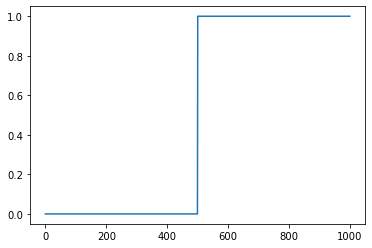

In [3]:
phi = np.asarray(np.append(np.zeros(500), np.ones(500)))
plt.plot(phi)
plt.show()

In [4]:
D = 50000
T = 10

dt = (1/2) / D
n = round(T/dt)
n

1000000

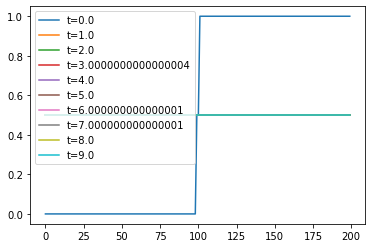

In [5]:
phi = np.asarray(np.append(np.zeros(100), np.ones(100)))

for i in range(n):
    phi_dx2 = dx_sq(phi)
    phi_centered = phi[1:-1]
    phi[1:-1] = phi_centered + (dt * D * phi_dx2)
    
    # Apply Neumann B.C.
    phi[0] = phi[1]
    phi[-1] = phi[-2]
    
    if i % (n/10) == 0:
        plt.plot(phi, label=f't={i*dt:.2f}')
plt.legend()
plt.show()

3.45
1.95
1.35
0.95
0.67
0.47
0.33
0.23
0.16
0.11


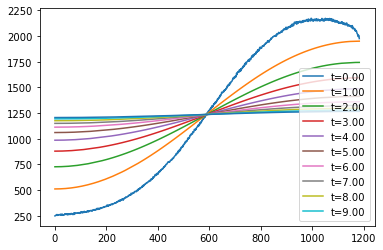

In [19]:
phi = np.asarray(pd.read_csv('intensity_data/frame_01.csv')['Value'])

for i in range(n):
    if i % (n/10) == 0:
        plt.plot(phi, label=f't={i*dt:.2f}')
        print(f'{(phi[592 + w] - phi[592 - w]) / (2 * w):.2f}')
    
    phi_dx2 = dx_sq(phi)
    phi_centered = phi[1:-1]
    phi[1:-1] = phi_centered + (dt * D * phi_dx2)
    
    # Apply Neumann B.C.
    phi[0] = phi[1]
    phi[-1] = phi[-2]

plt.plot(phi)
plt.legend()
plt.show()

3.45
1.94
1.45
1.01
0.55


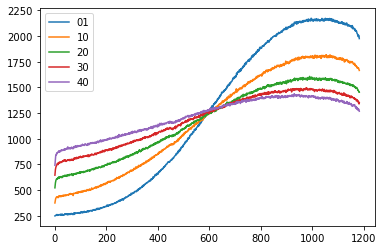

In [21]:
for frame in ['01', '10', '20', '30', '40']:
    intensities = pd.read_csv(f'intensity_data/frame_{frame}.csv')['Value']
    w = 30
    plt.plot(intensities, label=frame)
    print(f'{(intensities[592 + w] - intensities[592 - w]) / (2 * w):.2f}')
plt.legend()
plt.show()

# Calibrating Diffusion Coefficient to Data
- Starting from initial conditions (first frame), simulate the diffusion for a given diffusion coefficient called $D_{model}$
- Edge intensities are unreliable so use the intensities near the center. For this purpose, we will we use the slope of the intensity curve near the center as a metric called $m$.
- Match frames to simulated timepoints in simulation using $m$
- Convert $D_{model}$ to a real $D_{NS}$ by converting from pix/sim time to um/real time